In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv ("data.csv")

In [3]:
df.head ()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isna ().sum()   #Count the empty values in each column

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
#To drop the column with missing value
df=df.drop ('Unnamed: 32',axis=1)

In [9]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [10]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
#Convert column names to a list
l=list (df.columns)
print (l)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
# Convert non-numeric column to numeric values
df ['diagnosis'] = df ['diagnosis'].map ({'M':1,'B':0})
df ['diagnosis'].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='diagnosis', ylabel='count'>

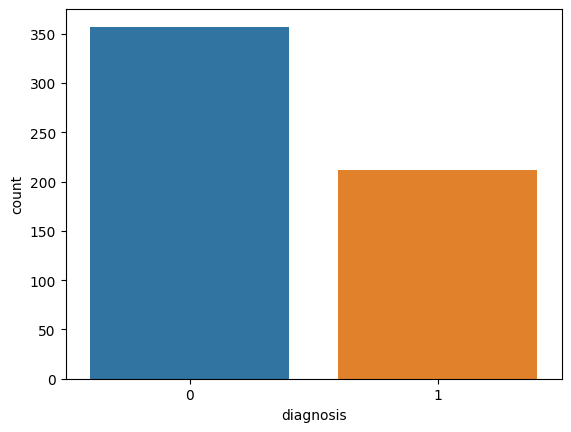

In [14]:
#Showing the total count of malignant and benign patients in a counterplot
sns.countplot(data=df, x='diagnosis')

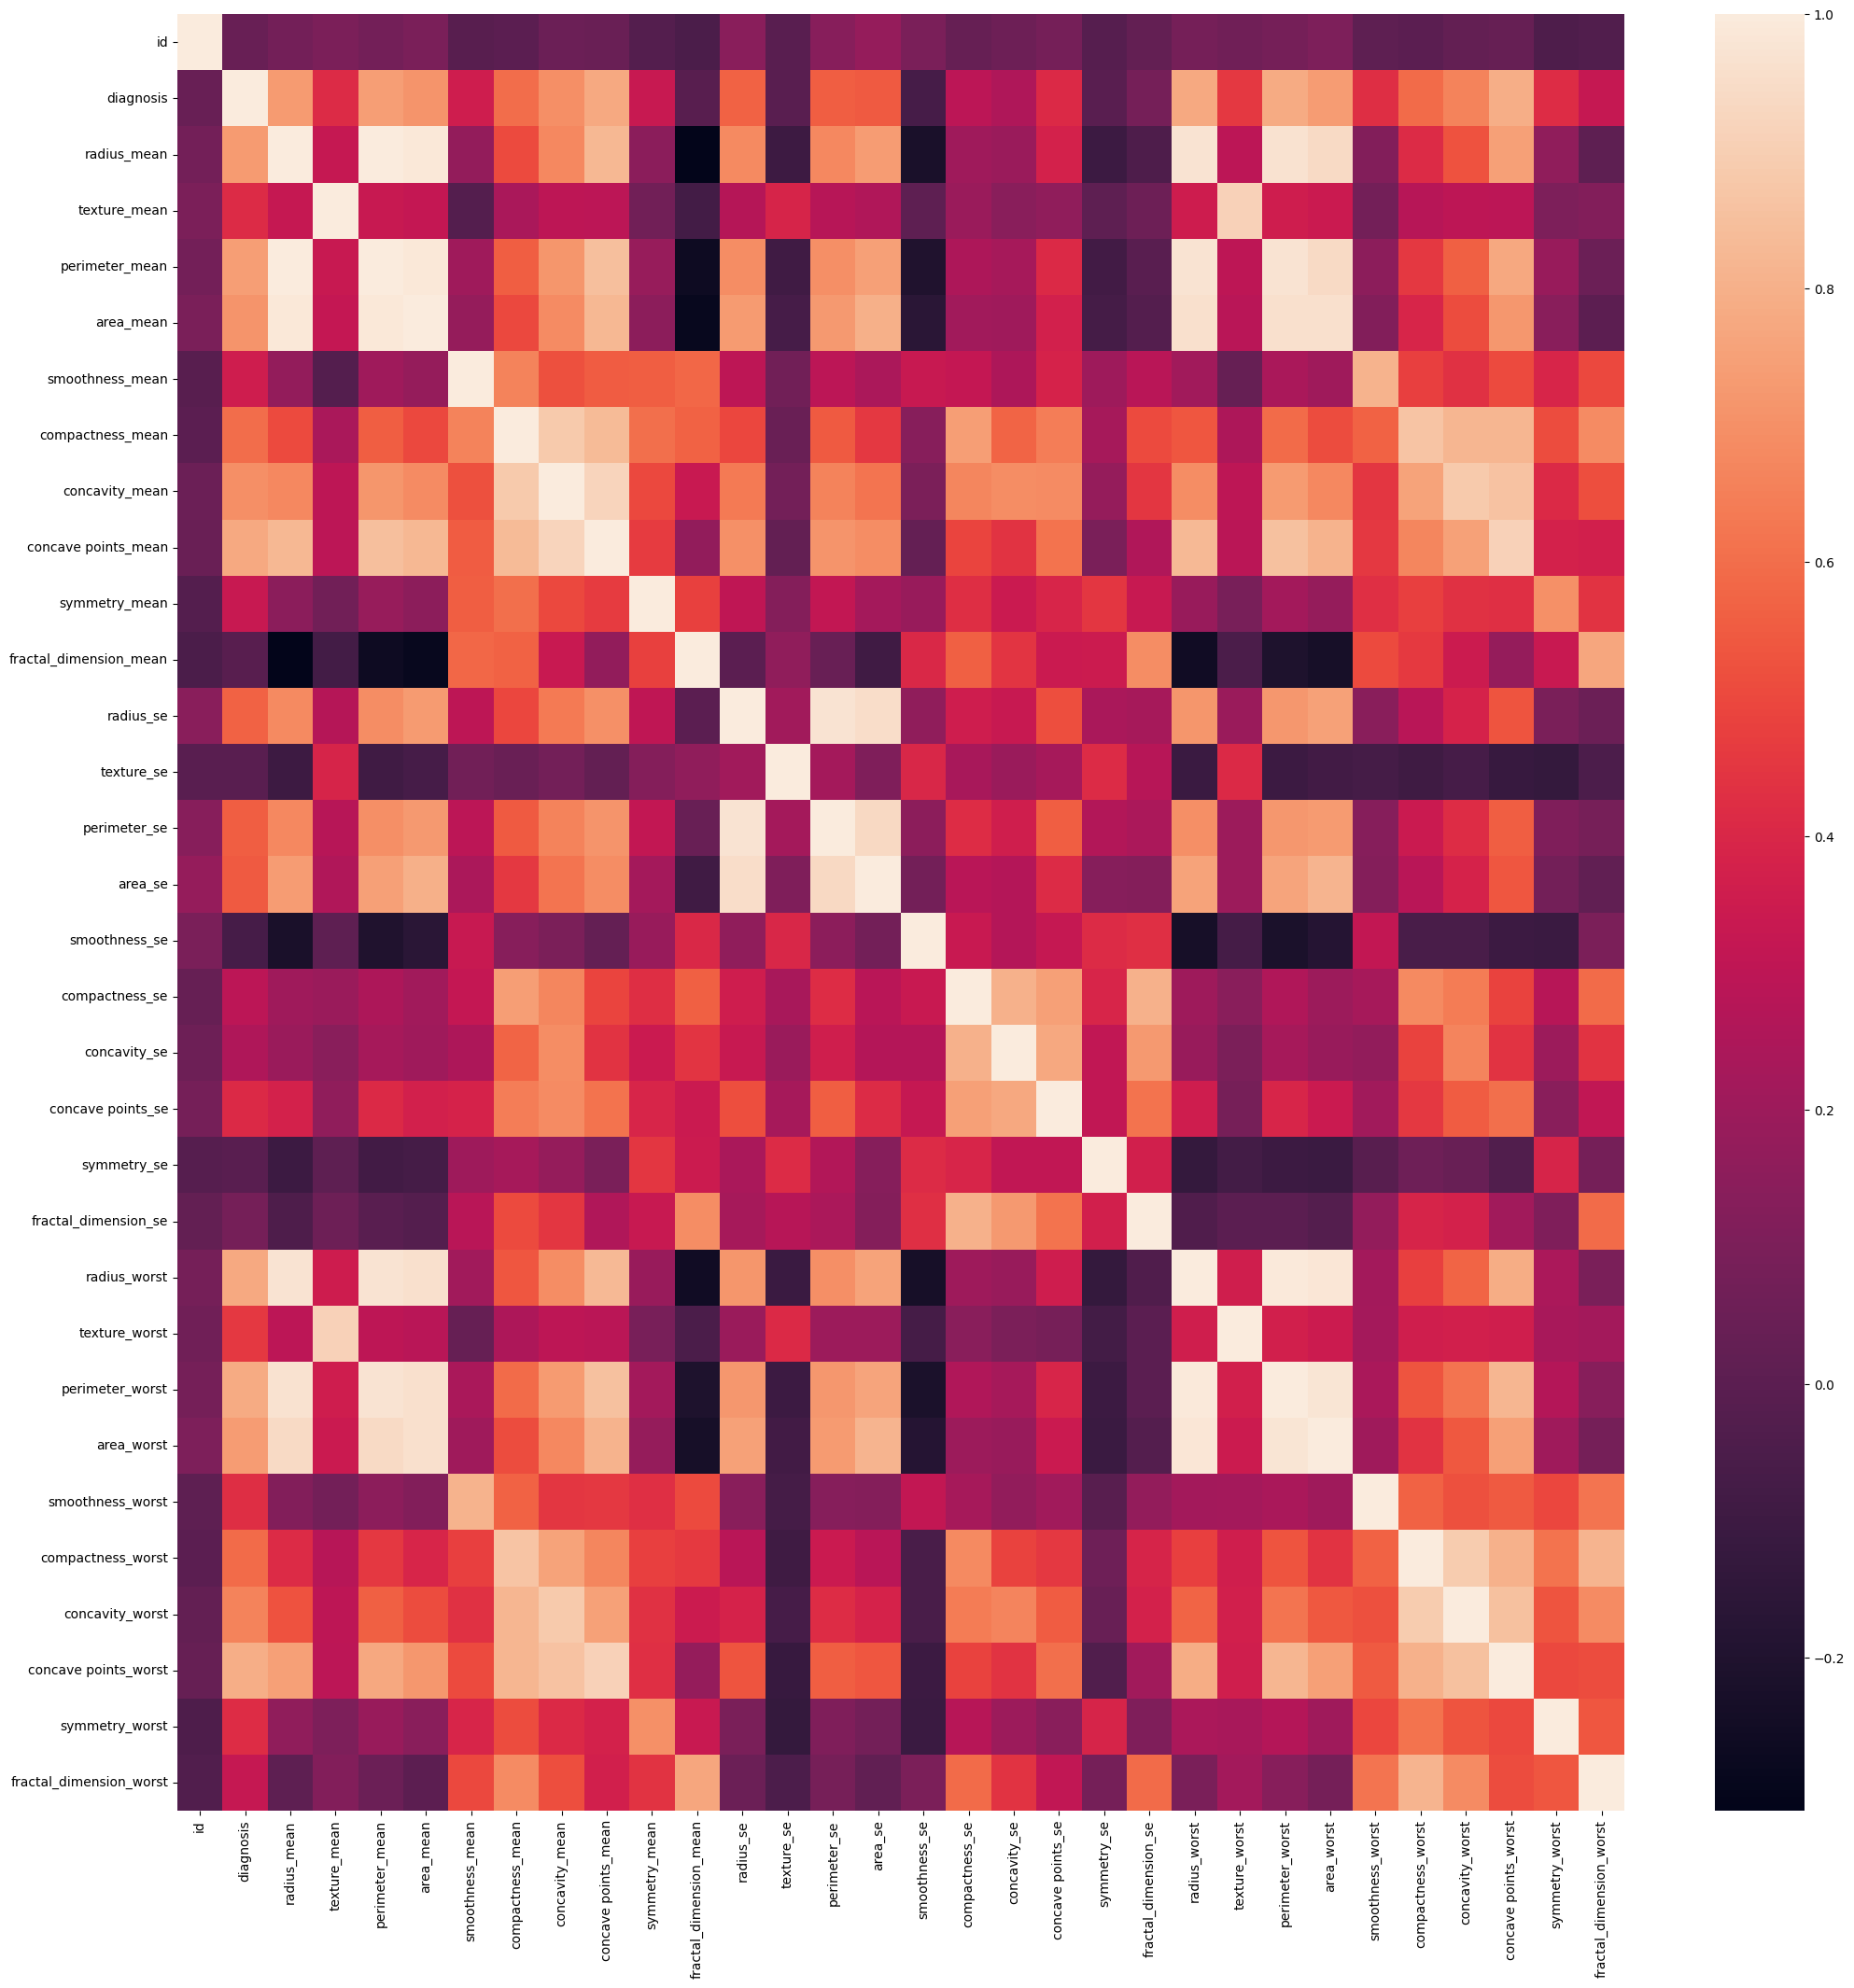

In [15]:
#Heatmap of Correlation
#Heatmap of Correlation
corr = df.corr()
plt.figure (figsize= (25,25))
sns.heatmap (corr);

In [16]:
x = df.drop ('diagnosis',axis=1)
y = df ['diagnosis']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.3)

In [19]:
x_train.shape

(398, 31)

In [20]:
y_test

156    1
443    0
275    0
457    0
148    0
      ..
105    1
321    1
438    0
13     1
210    1
Name: diagnosis, Length: 171, dtype: int64

In [21]:
#Feature Scaling of data
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()

In [22]:
x_train = ss.fit_transform (x_train)
x_test = ss.fit_transform (x_test)

In [23]:
x_train

array([[-0.16696318,  1.64055063,  0.49311888, ...,  1.00650521,
         0.25145344, -0.10300181],
       [-0.23280628,  0.45399334, -1.89436405, ...,  0.44546124,
        -0.55662184, -0.14477901],
       [-0.23279156, -0.4439419 , -0.29419309, ...,  0.37685531,
         0.50348472,  1.06845335],
       ...,
       [-0.23326297, -0.32732693, -0.02943331, ..., -1.59884276,
        -0.74249491, -1.21292029],
       [-0.16779299,  2.65218546,  0.60459669, ...,  1.80843221,
         1.0689799 ,  0.42316504],
       [-0.23318876, -0.57804911, -1.42755075, ..., -0.52005276,
         0.87995644,  0.4536511 ]])

In [24]:
x_test

array([[-0.18592397,  0.98302894,  0.42104736, ...,  0.60975198,
        -0.7202231 , -0.29683463],
       [-0.24343661, -0.92738876, -0.14733567, ..., -1.35633347,
        -0.31103101, -0.83099667],
       [-0.18444984, -0.57271205, -0.37280994, ..., -0.33375004,
        -1.14155224, -1.20576306],
       ...,
       [-0.24344063, -0.04607089,  0.15329668, ..., -0.79850539,
        -0.63352986, -0.7377049 ],
       [-0.24390397,  0.49131806,  1.17497693, ...,  0.00751665,
        -0.12030588, -1.07035671],
       [ 6.24499097,  1.76224291,  0.749864  , ...,  1.22567448,
         0.0530806 , -1.29532316]])

- Decision Tree Classifier

In [25]:
#Importing from Decision Tree Classifier from Scikit learn library
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [26]:
#Loading the training data in the model
dtc.fit (x_train,y_train)

DecisionTreeClassifier()

In [27]:
#Predicting output with the test data
y_pred=dtc.predict (x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of Decision Tree Classifier : ")
print(accuracy_score (y_test,y_pred))

Accuracy Score of Decision Tree Classifier : 
0.9064327485380117


- Logistic Regression

In [29]:
#Importing Logistic Regression from Scikit learn library
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [30]:
#Loading the training data in the model
lr.fit (x_train, y_train)

LogisticRegression()

In [31]:
#Predicting output with the test data
y_pred = lr.predict (x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [32]:
y_test

156    1
443    0
275    0
457    0
148    0
      ..
105    1
321    1
438    0
13     1
210    1
Name: diagnosis, Length: 171, dtype: int64

In [33]:
#Accuracy Score of Logistic Regression
from sklearn.metrics import accuracy_score

In [34]:
print("Accuracy Score of Logistic Regression: ")
print (accuracy_score (y_test,y_pred))

Accuracy Score of Logistic Regression: 
0.9824561403508771


- Random forest classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [36]:
#Loading the training data in the model
rfc.fit (x_train,y_train)

RandomForestClassifier()

In [37]:
#Predicting output with test data
y_pred = rfc.predict (x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [38]:
#Accuracy Score of Random Forest Classifier
from sklearn.metrics import accuracy_score

In [39]:
print("Accuracy Score of Random Forest Classifier : ")
print ( accuracy_score (y_test,y_pred))

Accuracy Score of Random Forest Classifier : 
0.9707602339181286


- Support vector classifier

In [40]:
from sklearn import svm
svc = svm.SVC ()
#Loading the training data in the model
svc.fit (x_train,y_train)

SVC()

In [41]:
#Predicting output with test data
y_pred = svc.predict (x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [42]:
#Accuracy Score of Support vector classifier
from sklearn.metrics import accuracy_score
print(" Accuracy Score of Support vector classifier: ")
print (accuracy_score (y_test,y_pred ))

 Accuracy Score of Support vector classifier: 
0.9707602339181286
